<a href="https://colab.research.google.com/github/sekhar0146/ML_Classification_projects/blob/main/Complete_classification_prediction_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the data
df = pd.read_csv("drive/My Drive/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Lets do some analysis based on historical data

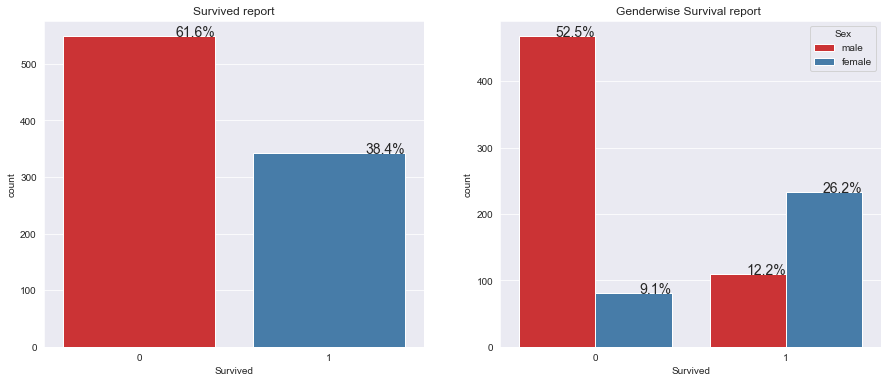

In [ ]:
sns.set_style("darkgrid") 
plt.figure(figsize=(15,6))

#==> Survived count
plt.subplot(1,2,1)
s = sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survived report')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)

#==> Genderwise Survival report 
plt.subplot(1,2,2)
s = sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Genderwise Survival report ')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)
    

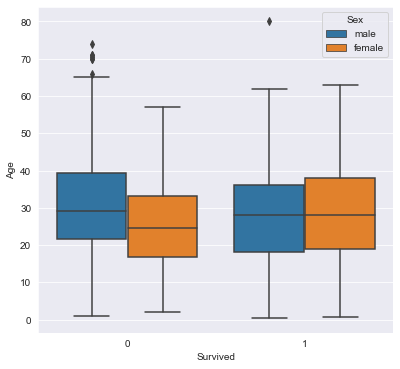

In [ ]:
sns.set_style("darkgrid") 
plt.figure(figsize=(14,6))

#==> Gender vs average age : Survived
plt.subplot(1,2,2)
box_plot = sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)

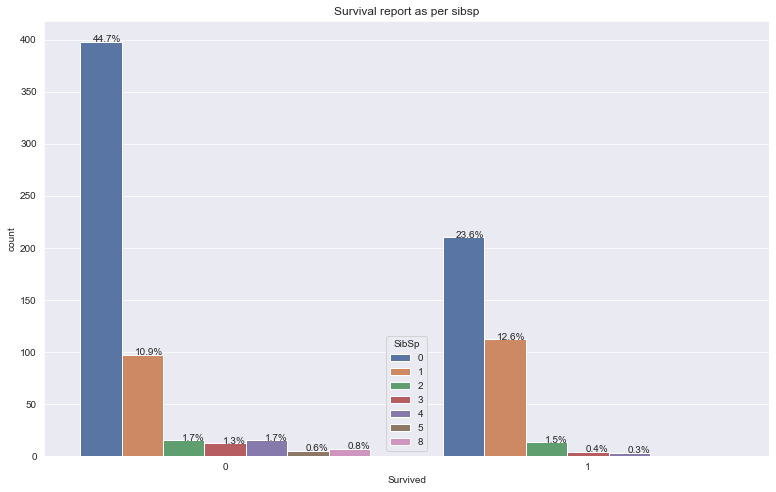

In [ ]:
# Survial report on Siblings
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

plt.figure(figsize=(13,8))
sns.set_style("darkgrid")

s = sns.countplot(x="Survived", hue='SibSp', data=df, palette='deep')

plt.title('Survival report as per sibsp')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=10)

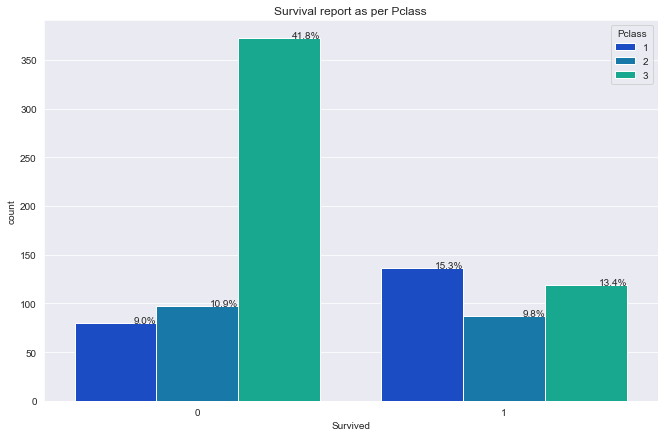

In [ ]:
plt.figure(figsize=(11,7))
sns.set_style("darkgrid")

s = sns.countplot(x="Survived", hue='Pclass', data=df, palette='winter')

plt.title('Survival report as per Pclass')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=10)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
len(df)

891

In [ ]:
df.PassengerId.value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [ ]:
df.PassengerId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
# Make a copy of original dataframe - for future reference
df_tmp = df.copy()

In [6]:
# There are some column data is not needed for predictions. So we will delete them from Dataframe
df_tmp.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [7]:
df_tmp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df_tmp.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_tmp.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
df_tmp.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df_tmp['Sex'] = np.where(df_tmp['Sex'] == 'female', 1, 0) # 1 - Female, 0 - Male
df_tmp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [9]:
# Fill missing age values with median
df_tmp['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_tmp['Cabin'].fillna('U', inplace=True)
df_tmp["Cabin"] = df_tmp["Cabin"].astype('category')
df_tmp["Cabin"] = df_tmp["Cabin"].cat.codes

# Fill missing Embarked data with 'U' because Embarked is the categorical data. 'U' means undefined
df_tmp['Embarked'].fillna('U', inplace=True)
df_tmp["Embarked"] = df_tmp["Embarked"].astype('category')
df_tmp["Embarked"] = df_tmp["Embarked"].cat.codes

df_tmp.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,147,2
1,1,1,1,38.0,1,0,71.2833,81,0
2,1,3,1,26.0,0,0,7.9250,147,2
3,1,1,1,35.0,1,0,53.1000,55,2
4,0,3,0,35.0,0,0,8.0500,147,2
5,0,3,0,28.0,0,0,8.4583,147,1
6,0,1,0,54.0,0,0,51.8625,129,2
7,0,3,0,2.0,3,1,21.0750,147,2
8,1,3,1,27.0,0,2,11.1333,147,2
9,1,2,1,14.0,1,0,30.0708,147,0


In [ ]:
df_tmp.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int16
Embarked       int8
dtype: object

In [ ]:
# Check for nulls again
df_tmp.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [10]:
# Split into X and y (on train set)
X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

In [11]:
np.random.seed(42)
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [12]:
# -------------------------------------------------
# Process test data set
# -------------------------------------------------
# import test set
df_test = pd.read_csv("drive/My Drive/titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
df_test_tmp = df_test.copy()

In [14]:
df_test_tmp.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)
df_test_tmp.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
df_test_tmp.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [15]:
df_test_tmp['Sex'] = np.where(df_test_tmp['Sex'] == 'female', 1, 0) # 1 - Female, 0 - Male

In [16]:
# Fill missing age values with median
df_test_tmp['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_test_tmp['Cabin'].fillna('U', inplace=True)
df_test_tmp["Cabin"] = df_test_tmp["Cabin"].astype('category')
df_test_tmp["Cabin"] = df_test_tmp["Cabin"].cat.codes

# Fill missing Embarked data with 'U' because Embarked is the categorical data. 'U' means undefined
df_test_tmp["Embarked"] = df_test_tmp["Embarked"].astype('category').cat.codes

# Fill missing Fare values with median
df_test_tmp['Fare'].replace(np.NaN, df_tmp['Fare'].median(), inplace=True)

In [17]:
print(df_test_tmp.isna().sum())
print("")
print(df_test_tmp.dtypes)
print("")
print(df_test_tmp.head())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin          int8
Embarked       int8
dtype: object

   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    0  34.5      0      0   7.8292     76         1
1       3    1  47.0      1      0   7.0000     76         2
2       2    0  62.0      0      0   9.6875     76         1
3       3    0  27.0      0      0   8.6625     76         2
4       3    1  22.0      1      1  12.2875     76         2


In [18]:
# Find the column differences b/w training and test data sets
print("Find the column differences b/w training and test data sets:")
print(set(X_train.columns) - set(df_test_tmp.columns))
print(set(df_test_tmp.columns) - set(X_train.columns))

Find the column differences b/w training and test data sets:
set()
set()


In [19]:
# ===========================================
# Modele processing 
# ===========================================
models={"RandomForestClassifier": RandomForestClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression()
        }

In [20]:
# create function to fit score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    # Loop thru models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model score and sppend it to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
# Print the model scores
model_scores

{'KNeighborsClassifier': 0.7094972067039106,
 'LogisticRegression': 0.7877094972067039,
 'RandomForestClassifier': 0.8044692737430168}

          RandomForestClassifier  KNeighborsClassifier  LogisticRegression
accuracy                0.804469              0.709497            0.787709

                        accuracy
RandomForestClassifier  0.804469
KNeighborsClassifier    0.709497
LogisticRegression      0.787709



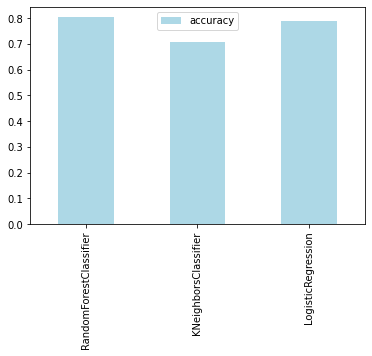

In [23]:
# model comparison 
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare)
print("")
model_compare = model_compare.T
print(model_compare)
print("")
model_compare.plot.bar(color='lightblue');

In [24]:
print("======================================================================")
print("Hyperparameter tuning by RandomizedSearchCV for RandomForestClassifier")
print("======================================================================")
# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit the model
rs_rf.fit(X_train, y_train)

print("== Best paramerts for RandomForestClassifier: ")
print(rs_rf.best_params_)
print("")
print("== Score for RandomForestClassifier:")
print(rs_rf.score(X_test, y_test))

Hyperparameter tuning by RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


== Best paramerts for RandomForestClassifier: 
{'n_estimators': 710, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_depth': 10}

== Score for RandomForestClassifier:
0.8268156424581006


In [25]:
# Tune again with other parameters
forest = RandomForestClassifier(random_state = 1, n_estimators = 15, min_samples_split = 5, max_features=2, max_depth=30)
# Fit the model
forest.fit(X_train, y_train)
print("RandomForestClassifier score after tuning again : ", forest.score(X_test, y_test))

RandomForestClassifier score after tuning again :  0.8268156424581006


In [27]:
print("======================================================================")
print("Hyperparameter tuning by GridsearchCV for LogisticRegression")
print("======================================================================")
# Create hyperparameter grid for LogisticRegression
log_reg_grid2 = {"C": np.logspace(-1, 4, 30),
                "solver": ["liblinear"]}

np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                param_grid=log_reg_grid2,
                                cv=5,
                                verbose=True)
gs_log_reg.fit(X_train, y_train)
print("== Best paramerts for LogisticRegression: ")
print(gs_log_reg.best_params_)
print("")
print("== Score for LogisticRegression:")
print(gs_log_reg.score(X_test, y_test))

Hyperparameter tuning by GridsearchCV for LogisticRegression
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


== Best paramerts for LogisticRegression: 
{'C': 0.14873521072935114, 'solver': 'liblinear'}

== Score for LogisticRegression:
0.7821229050279329


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [ ]:
# -----------------------------------------
# Model RandomForestClassifier
# -----------------------------------------
#model = RandomForestClassifier(random_state=42)
#model.fit(X_train, y_train)
#print("Model(RandomForestClassifier) score: ", model.score(X_test, y_test))
#print("")

In [28]:
# Lets do prediction test set (as per requirement)
print("========= Predicted Survived ============ ")
test_pred = rs_rf.predict(df_test_tmp)
#print(len(test_pred))
print(test_pred)
print("")

========= Predicted Survived ============ 
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]



In [29]:
test_pred.shape

(418,)

In [30]:
df_test.shape, df_test_tmp.shape

((418, 11), (418, 8))

In [31]:
# Check the metrics
y_pred = rs_rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Confution matrix
print(" == confusion_matrix")
print(confusion_matrix(y_test, y_pred))

 == confusion_matrix
[[93 12]
 [19 55]]


In [33]:
# visualize confusion matrix with pd.crosstab()
cf = pd.crosstab(y_test,
                 y_pred,
                 rownames=["Actual labels"],
                 colnames=["Predicted labels"])
cf

Predicted labels,0,1
Actual labels,,
0,93,12
1,19,55


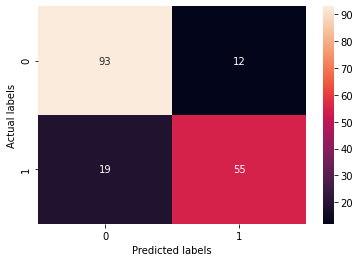

In [34]:
sns.heatmap(cf, annot=True);

In [35]:
# Lets get classification report
print("classification_report:") 
print(classification_report(y_test, y_pred))

classification_report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [36]:
# Now we need to format as per the requirement
df_prediction_survived = pd.DataFrame()
df_prediction_survived["PassengerId"] = df_test["PassengerId"]
df_prediction_survived["Survived"] = test_pred
print(df_prediction_survived)

# Save the prediction results in the csv file
df_prediction_survived.to_csv("/content/drive/My Drive/titanic/Survived_classification_prediction.csv",
                               index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [37]:
# ----------------------------------------------
# Lets try with boosting algorithms 
# ----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
# GradientBoostingClassifier()
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_score = gbc.score(X_test, y_test)
gbc_score

0.8212290502793296

In [42]:
# ------------------------------------------------------------
# GradientBoostingClassifier Hyperparameter tuning with RandomizedSearchCV
# ------------------------------------------------------------
print("=== Hyperparameter tuning with GradientBoostingClassifier ===")
# different GradientBoostingClassifier hyperparameters
rf_gb_grid = {"n_estimators": np.arange(200, 2000, 10),
           "max_depth": [None, 3 , 5, 10, 20, 30],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "learning_rate": [0.1, 0.05, 0.02, 0.01]
           }

# Instantiate GradientBoostingClassifier model
rs_gb_model = RandomizedSearchCV(GradientBoostingClassifier(random_state=40),
                              param_distributions=rf_gb_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the model
rs_gb_model.fit(X_train, y_train)

print("Best parameters for GradientBoostingClassifier ==>")
print(rs_gb_model.best_params_)
print("GradientBoostingClassifier score : ", rs_gb_model.score(X_test, y_test))

=== Hyperparameter tuning with GradientBoostingClassifier ===
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished


Best parameters for GradientBoostingClassifier ==>
{'n_estimators': 1010, 'min_samples_split': 12, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.02}
GradientBoostingClassifier score :  0.8268156424581006


In [41]:
# XGBClassifier()
xbc = XGBClassifier()
xbc.fit(X_train, y_train)
xbc_score = xbc.score(X_test, y_test)
xbc_score

0.8100558659217877

In [43]:
# ------------------------------------------------------------
# XGBClassifier Hyperparameter tuning with RandomizedSearchCV
# ------------------------------------------------------------
print("=== Hyperparameter tuning with XGBClassifier ===")
# different XGBClassifier hyperparameters
rs_xb_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Instantiate XGBClassifier modl
rs_xb_model = RandomizedSearchCV(XGBClassifier(random_state=40),
                              param_distributions=rs_xb_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the model
rs_xb_model.fit(X_train, y_train)

print("Best parameters for XGBClassifier ==>")
print(rs_xb_model.best_params_)
print("XGBClassifier score : ", rs_xb_model.score(X_test, y_test))

=== Hyperparameter tuning with XGBClassifier ===
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters for XGBClassifier ==>
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}
XGBClassifier score :  0.8044692737430168


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
